#Random Tree Regression

#Import Libraries

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset


In [49]:
data = pd.read_csv('car.csv')


# Preview the dataset (optional)


In [50]:
print(data.head())

   Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0  2010              72000          3             0           1    26.60   
1  2015              41000          2             0           1    19.67   
2  2012              85000          2             1           2    15.00   
3  2014             110000          2             0           1    13.50   
4  2016              58950          2             0           1    25.80   

   Engine   Power  Seats  Price  
0     998   58.16      5   1.75  
1    1582  126.20      5  12.50  
2    2179  115.00      5  17.50  
3    2477  175.56      7  15.00  
4    1498   98.60      5   5.40  


# Preprocess the data
# Handling categorical variables by converting them into dummy variables


In [51]:
data = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)


In [52]:
X = data.drop('Price', axis=1)
y = data['Price']

# Split the dataset into training and testing sets


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Decision Tree Regression model



In [54]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model

In [55]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Make predictions on the training and test sets



In [56]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Evaluate the model

In [57]:
# Evaluate the model on training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Data - Mean Squared Error: {mse_train}")
print(f"Training Data - R-squared: {r2_train}")
print(f"Testing Data - Mean Squared Error: {mse_test}")
print(f"Testing Data - R-squared: {r2_test}")




Training Data - Mean Squared Error: 2.220710302218858
Training Data - R-squared: 0.981245926275961
Testing Data - Mean Squared Error: 22.643559194629635
Testing Data - R-squared: 0.8493424990525574


#Compare actual vs predicted prices


In [59]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(comparison.head())




      Actual  Predicted
856     1.90     2.2133
3657    4.50     5.0088
4602    4.75     3.9909
4368   47.50    43.7495
3868    2.90     3.9297


# Visualization: Actual vs Predicted for Training Data


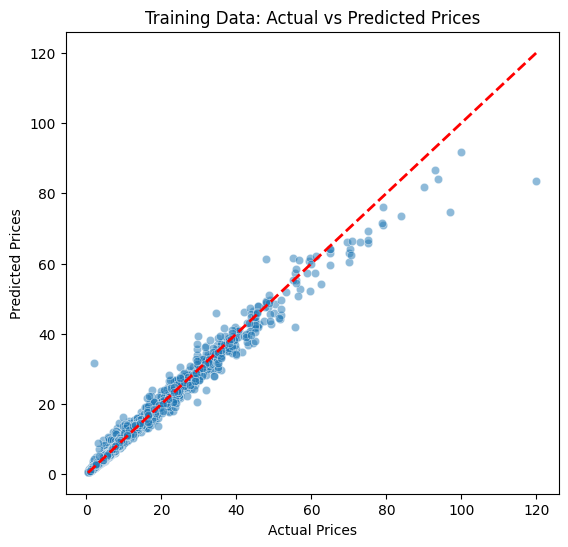

In [60]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.5)
plt.title('Training Data: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)


# Visualization: Actual vs Predicted for Testing Data


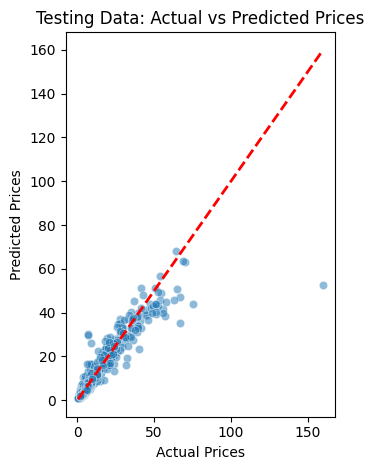

In [61]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.title('Testing Data: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.tight_layout()
plt.show()

#EDA

# Display basic information


In [62]:
print("Initial Data Info:\n", data.info())
print("\nInitial Data Description:\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4970 non-null   int64  
 1   Kilometers_Driven  4970 non-null   int64  
 2   Fuel_Type          4970 non-null   int64  
 3   Transmission       4970 non-null   int64  
 4   Owner_Type         4970 non-null   int64  
 5   Mileage            4970 non-null   float64
 6   Engine             4970 non-null   int64  
 7   Power              4970 non-null   float64
 8   Seats              4970 non-null   int64  
 9   Price              4970 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 388.4 KB
Initial Data Info:
 None

Initial Data Description:
               Year  Kilometers_Driven    Fuel_Type  Transmission   Owner_Type  \
count  4970.000000       4.970000e+03  4970.000000   4970.000000  4970.000000   
mean   2013.366600       5.904794e+04     1.554930

# 1. Summary Statistics

In [64]:

print("Summary Statistics:\n", data.describe())


Summary Statistics:
               Year  Kilometers_Driven    Fuel_Type  Transmission   Owner_Type  \
count  4970.000000       4.970000e+03  4970.000000   4970.000000  4970.000000   
mean   2013.366600       5.904794e+04     1.554930      0.286117     1.200201   
std       3.239673       9.928827e+04     0.519591      0.451990     0.453026   
min    1998.000000       1.710000e+02     1.000000      0.000000     1.000000   
25%    2011.000000       3.400000e+04     1.000000      0.000000     1.000000   
50%    2014.000000       5.300000e+04     2.000000      0.000000     1.000000   
75%    2016.000000       7.300000e+04     2.000000      1.000000     1.000000   
max    2019.000000       6.500000e+06     3.000000      1.000000     4.000000   

           Mileage       Engine        Power        Seats        Price  
count  4970.000000  4970.000000  4970.000000  4970.000000  4970.000000  
mean     18.289789  1620.619718   115.507487     5.279276     9.426809  
std       4.148978   595.62153


# 2. Missing Values Analysis


In [65]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


# 3. Distribution of the Target Variable (Price)


Text(0, 0.5, 'Frequency')

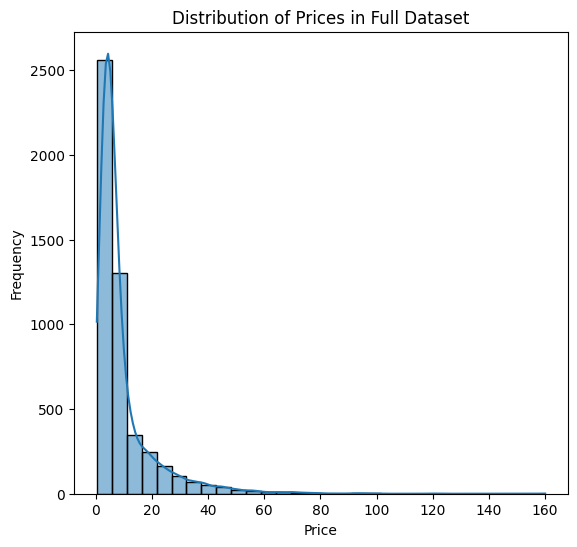

In [66]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Price'], kde=True, bins=30)
plt.title('Distribution of Prices in Full Dataset')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 4. Correlation Matrix (only numerical features)


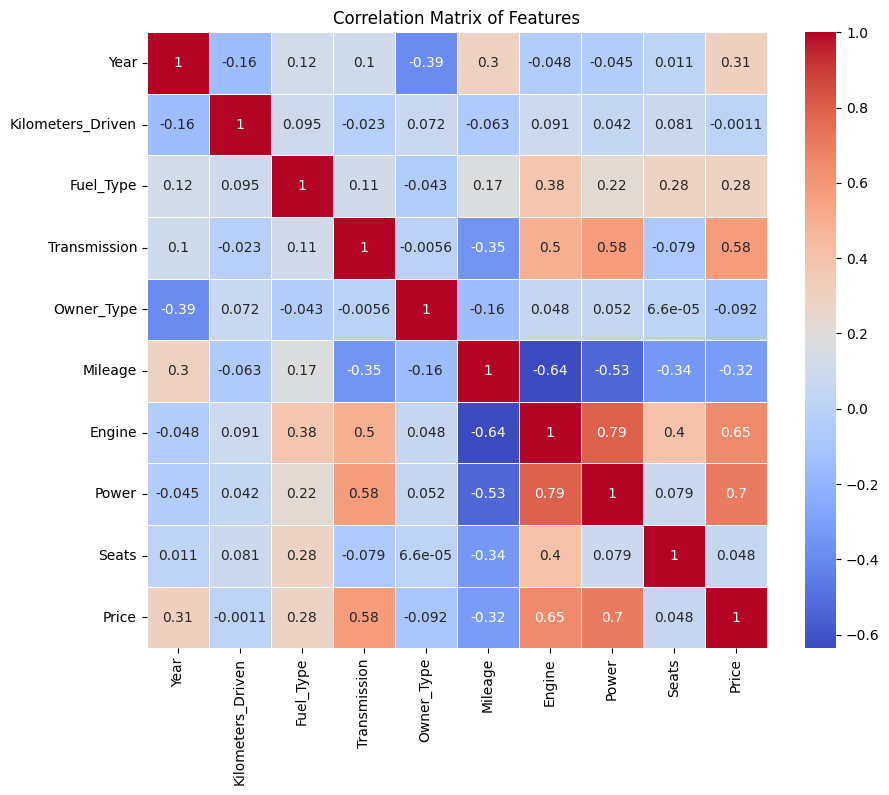

In [68]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 5. Pair Plot (Numerical Features)


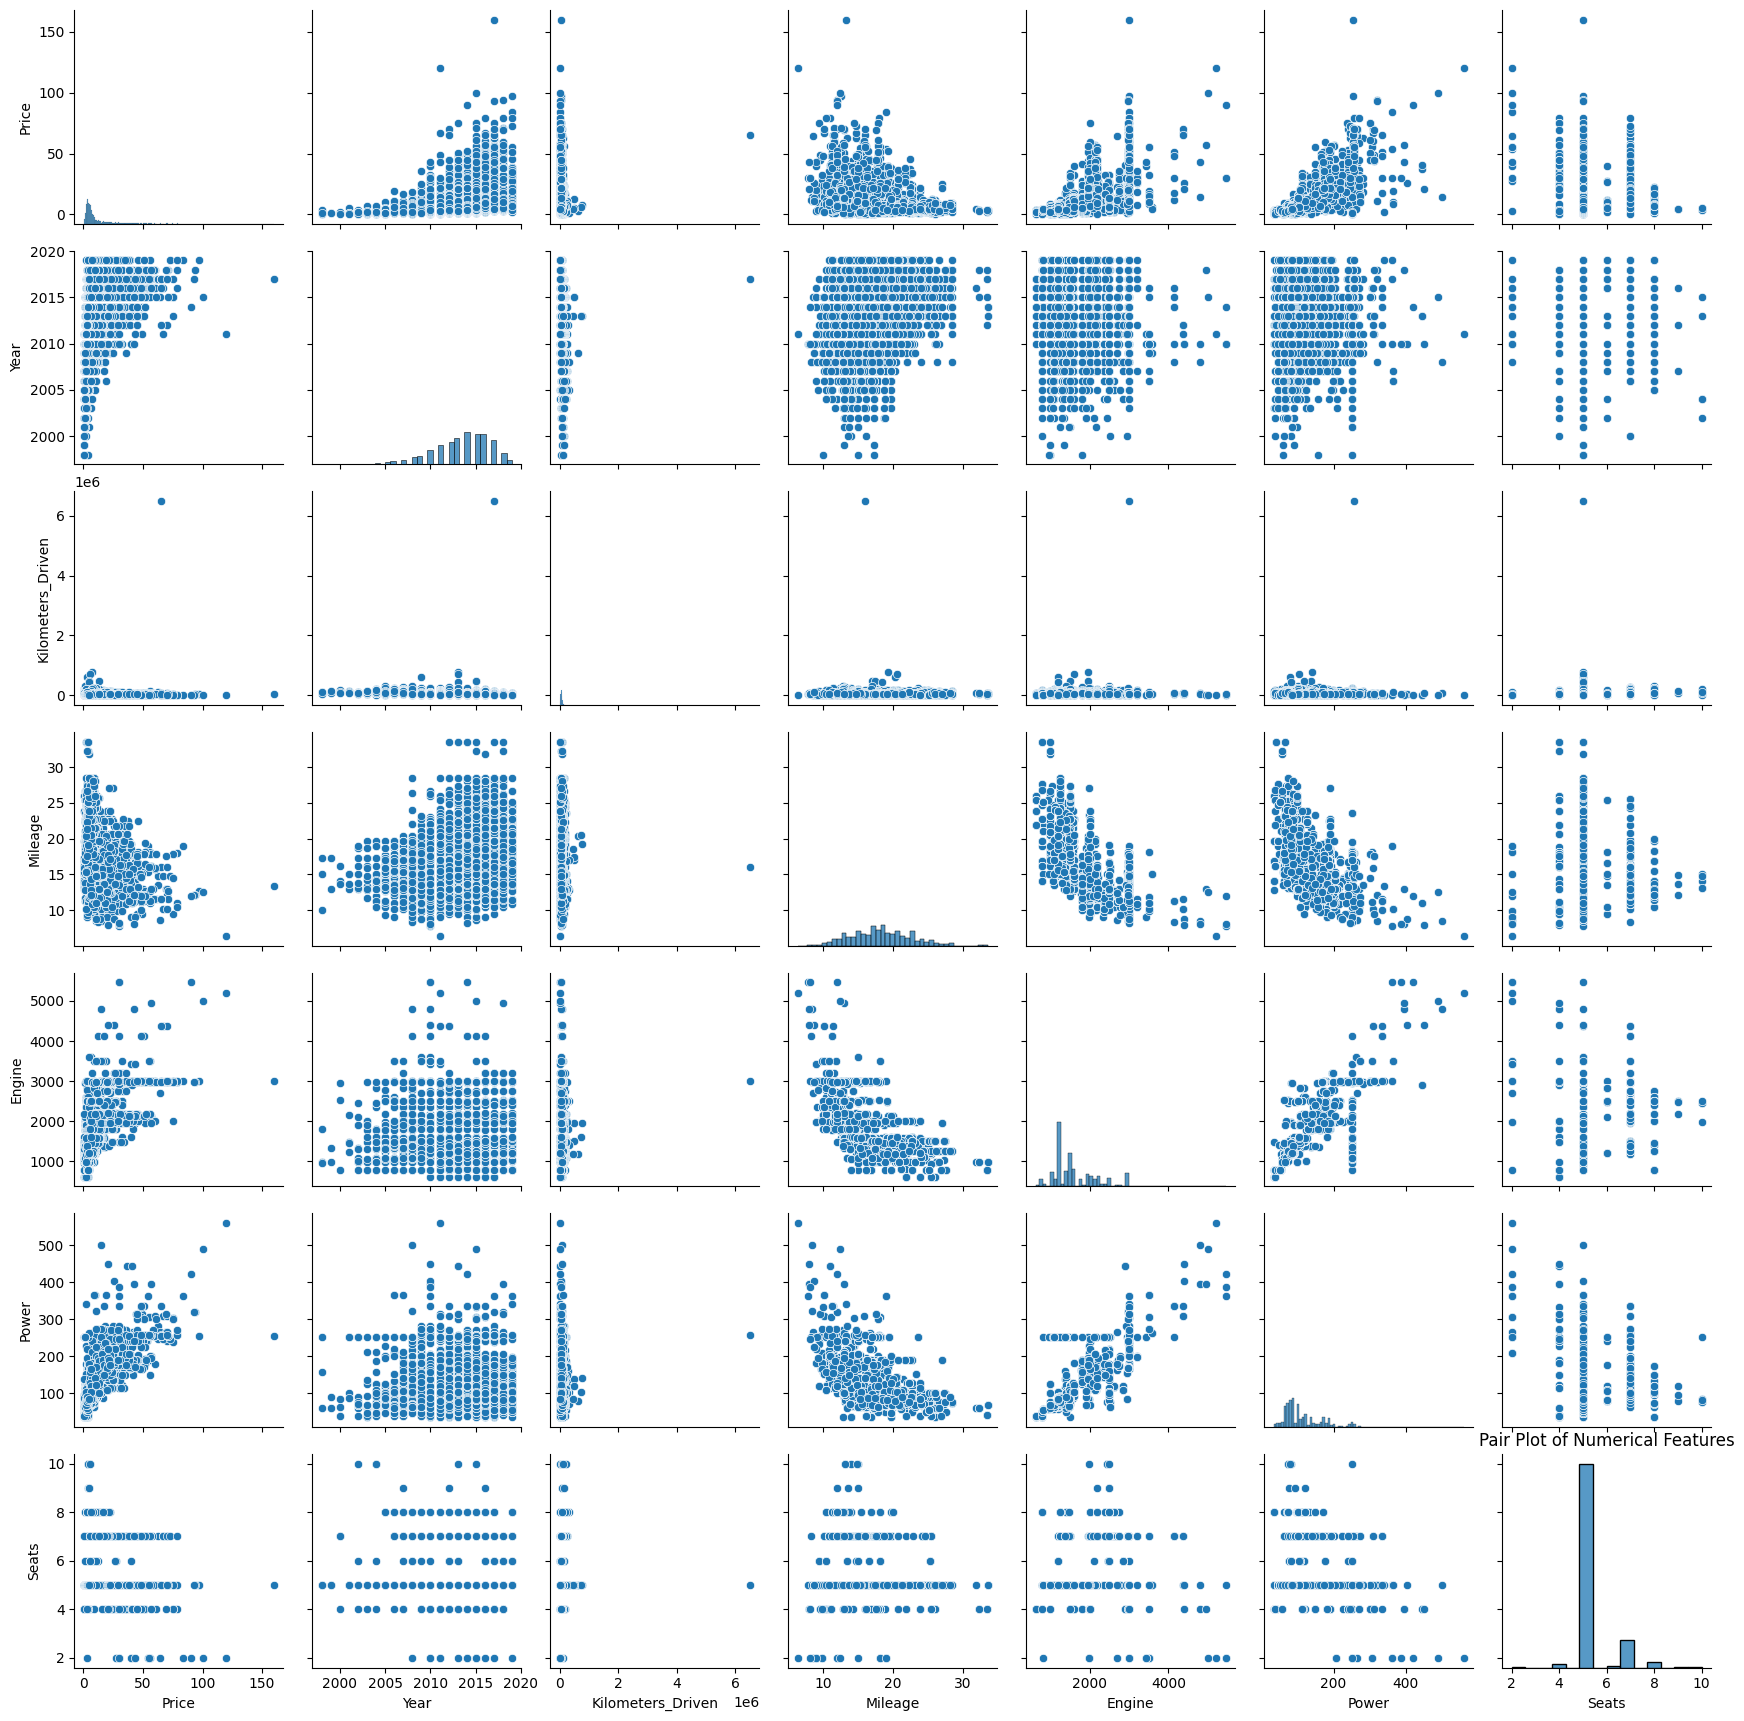

In [69]:
sns.pairplot(data[['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']])
plt.title('Pair Plot of Numerical Features')
plt.show()

# 6. Box Plot for Outlier Detection


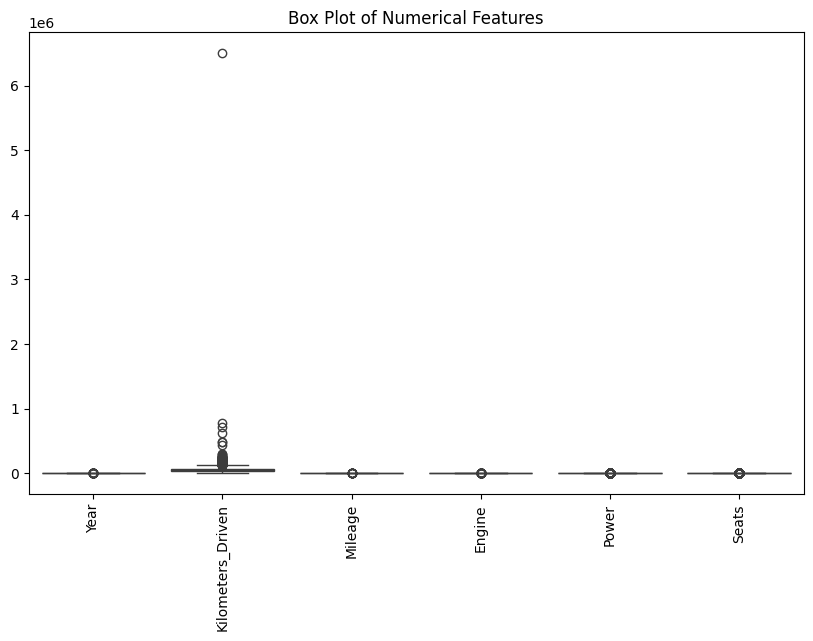

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']])
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()


# 7. Count Plots for Categorical Features (Fuel_Type, Transmission, Owner_Type)


In [71]:
plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>


# Plot for Fuel_Type,Transmission,Owner_type

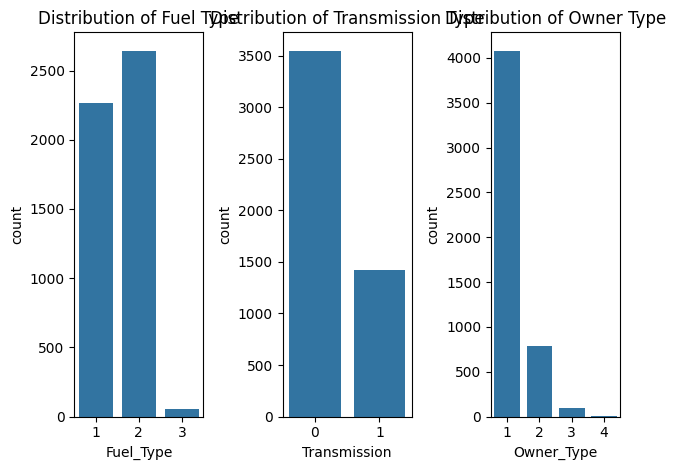

In [43]:
# Plot for Fuel_Type
plt.subplot(1, 3, 1)
sns.countplot(x='Fuel_Type', data=data)
plt.title('Distribution of Fuel Type')

  # Plot for Transmission
plt.subplot(1, 3, 2)
sns.countplot(x='Transmission', data=data)
plt.title('Distribution of Transmission Type')

# Plot for Owner_Type
plt.subplot(1, 3, 3)
sns.countplot(x='Owner_Type', data=data)
plt.title('Distribution of Owner Type')

plt.tight_layout()
plt.show()





#Visiualization On Training and Testing Data

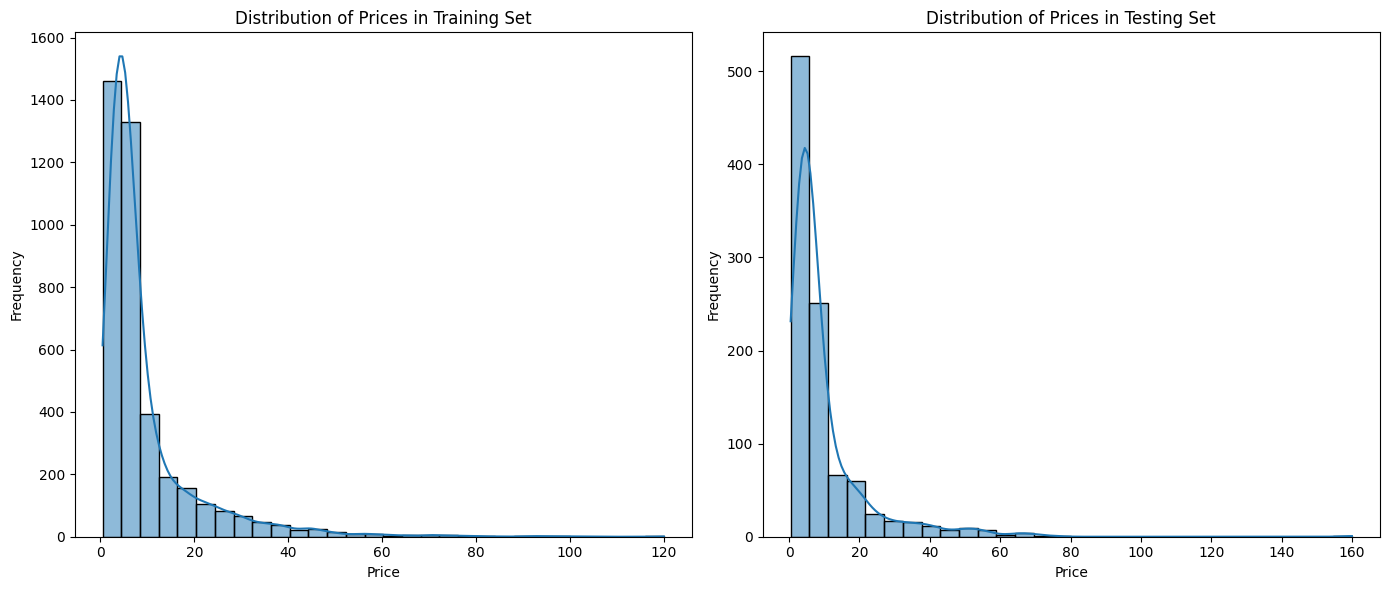

In [73]:
# 1. Distribution of the Target Variable (Price) in Training and Testing Sets
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
# Use y_train which should contain the 'Price' column
sns.histplot(y_train, kde=True, bins=30)
plt.title('Distribution of Prices in Training Set')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Use y_test which should contain the 'Price' column
sns.histplot(y_test, kde=True, bins=30)
plt.title('Distribution of Prices in Testing Set')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()